In [ ]:
import sys
sys.path.append('..')


import matplotlib
matplotlib.use('Agg')  

from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

%matplotlib inline

print(" Setup complete with Agg backend")
print(f"Matplotlib backend: {matplotlib.get_backend()}")

In [ ]:
print("Loading Papluca Language Identification Dataset...")
dataset = load_dataset("papluca/language-identification")

# Basic information
print(f"\n Dataset Structure:")
print(dataset)

print(f"\n Split Sizes:")
for split in dataset.keys():
    print(f"  {split}: {len(dataset[split])} samples")

print(f"\n Features:")
for feature_name, feature_type in dataset["train"].features.items():
    print(f"  {feature_name}: {feature_type}")

Loading Papluca Language Identification Dataset...


Using the latest cached version of the dataset since papluca/language-identification couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Skop\.cache\huggingface\datasets\papluca___language-identification\default\0.0.0\aa56583bf2bc52b0565770607d6fc3faebecf9e2 (last modified on Sun Jan  4 20:07:04 2026).



📊 Dataset Structure:
DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 70000
    })
    validation: Dataset({
        features: ['labels', 'text'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 10000
    })
})

📈 Split Sizes:
  train: 70000 samples
  validation: 10000 samples
  test: 10000 samples

🔤 Features:
  labels: Value('string')
  text: Value('string')


In [ ]:
print("Converting to Pandas DataFrames...")
train_df = pd.DataFrame(dataset["train"])
test_df = pd.DataFrame(dataset["test"])

# Display first few samples
print("\n First 5 training samples:")
display(train_df.head())

print("\n Sample texts:")
for i in range(3):
    print(f"\nSample {i+1} (Label: {train_df.iloc[i]['labels']}):")
    print(f"Text: {train_df.iloc[i]['text'][:100]}...")

Available variables: ['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__vsc_ipynb_file__', '_i', '_ii', '_iii', '_i1', 'sys', 'matplotlib', 'load_dataset', 'pd', 'np', 'plt', 'sns', '_i2', 'dataset', 'split', 'feature_name', 'feature_type', '_i3', 'train_df', 'test_df', 'i', '_i4', '_i5', '_i6']
pd defined? True
dataset defined? True
Converting to Pandas DataFrames...

👀 First 5 training samples:


,labels,text
0,pt,"os chefes de defesa da estónia, letónia, lituâ..."
1,bg,размерът на хоризонталната мрежа може да бъде ...
2,zh,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3,th,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...
4,ru,Он увеличил давление .



📝 Sample texts:

Sample 1 (Label: pt):
Text: os chefes de defesa da estónia, letónia, lituânia, alemanha, itália, espanha e eslováquia assinarão ...

Sample 2 (Label: bg):
Text: размерът на хоризонталната мрежа може да бъде по реда на няколко километра ( km ) за на симулация до...

Sample 3 (Label: zh):
Text: 很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把这段话复制走了，既能赚积分，还省事，走到哪复制到哪，最重要的是，不用认真的评论了，不用想还差多少字，直接发出...


In [ ]:
print("Analyzing Language Distribution...")

# Get label names (if available)
try:
    label_names = dataset["train"].features["label"].names
    print(f"\nNumber of languages: {len(label_names)}")
    print("Language names:", label_names)
except:
    print("\nLabel names not available in dataset features")
    

# Count samples per language
label_counts = train_df["labels"].value_counts().sort_index()

print(f"\n Samples per language (train set):")
for label, count in label_counts.items():
    print(f"  Language {label}: {count} samples")

print(f"\n Statistics:")
print(f"  Total samples: {len(train_df)}")
print(f"  Number of languages: {len(label_counts)}")
print(f"  Average samples per language: {label_counts.mean():.1f}")
print(f"  Min samples: {label_counts.min()}")
print(f"  Max samples: {label_counts.max()}")

Analyzing Language Distribution...

Label names not available in dataset features

📈 Samples per language (train set):
  Language ar: 3500 samples
  Language bg: 3500 samples
  Language de: 3500 samples
  Language el: 3500 samples
  Language en: 3500 samples
  Language es: 3500 samples
  Language fr: 3500 samples
  Language hi: 3500 samples
  Language it: 3500 samples
  Language ja: 3500 samples
  Language nl: 3500 samples
  Language pl: 3500 samples
  Language pt: 3500 samples
  Language ru: 3500 samples
  Language sw: 3500 samples
  Language th: 3500 samples
  Language tr: 3500 samples
  Language ur: 3500 samples
  Language vi: 3500 samples
  Language zh: 3500 samples

📊 Statistics:
  Total samples: 70000
  Number of languages: 20
  Average samples per language: 3500.0
  Min samples: 3500
  Max samples: 3500


🎨 Creating visualizations...


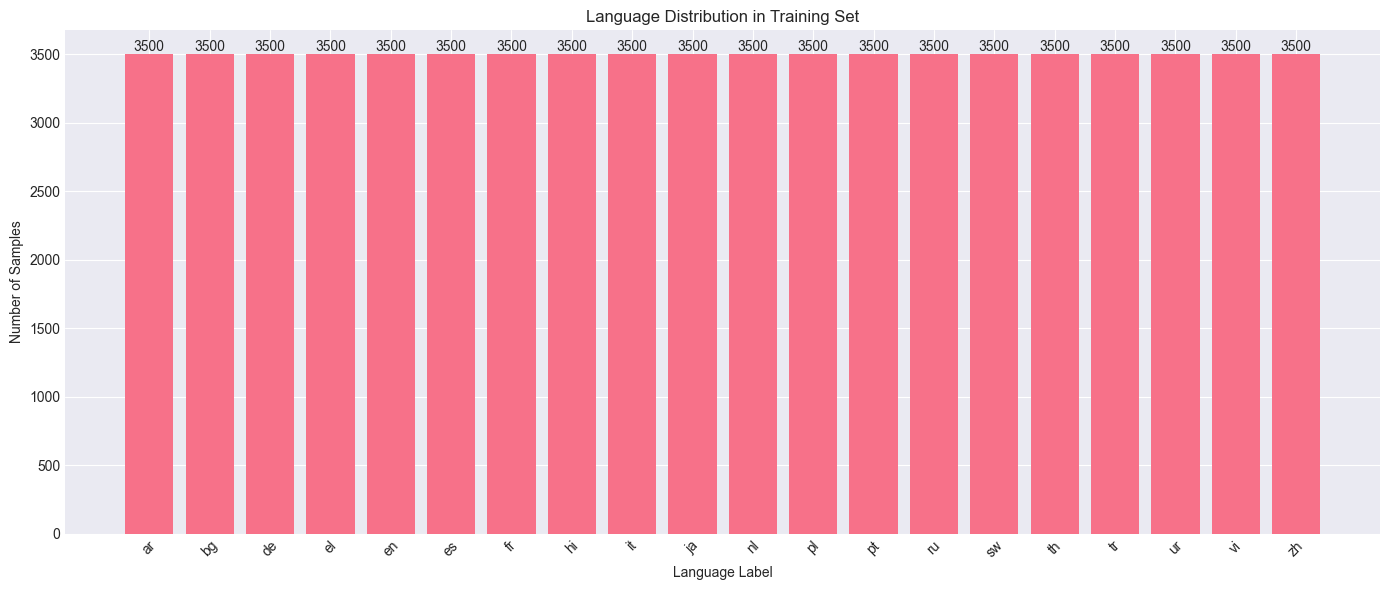


📏 Analyzing text lengths...


C:\Users\Skop\AppData\Local\Temp\ipykernel_18180\2526348335.py:49: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_top_df = top_df.groupby('labels').apply(lambda x: x.sample(min(100, len(x)))).reset_index(drop=True)
C:\Users\Skop\AppData\Local\Temp\ipykernel_18180\2526348335.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot([sample_top_df[sample_top_df['labels']==lang]['word_count'].values


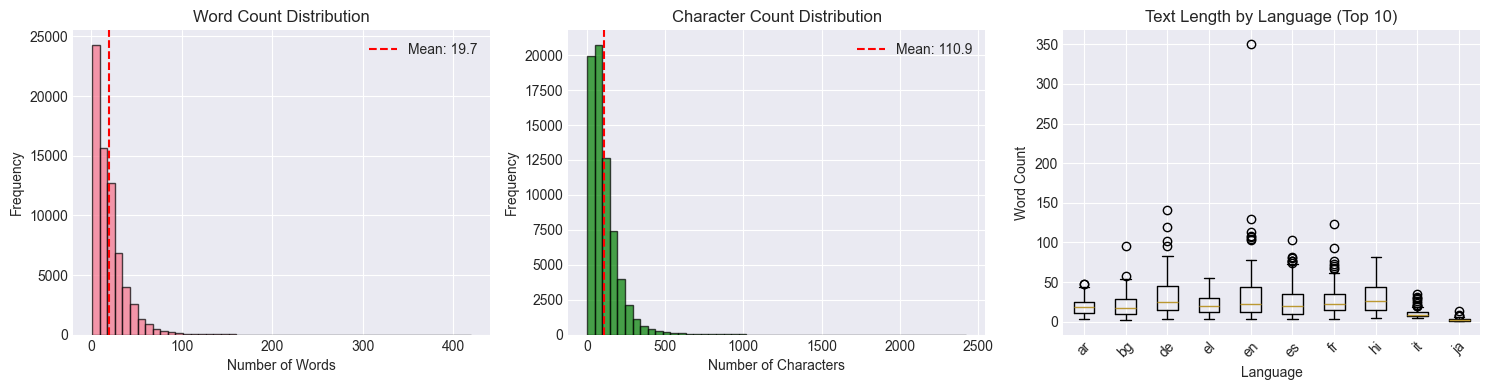

In [ ]:

print(" Creating visualizations...")

# Figure 1: Language Distribution Bar Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(range(len(label_counts)), label_counts.values)
plt.xlabel('Language Label')
plt.ylabel('Number of Samples')
plt.title('Language Distribution in Training Set')
plt.xticks(range(len(label_counts)), label_counts.index, rotation=45)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n Analyzing text lengths...")
train_df['word_count'] = train_df['text'].str.split().str.len()
train_df['char_count'] = train_df['text'].str.len()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Word count distribution
axes[0].hist(train_df['word_count'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Word Count Distribution')
axes[0].axvline(train_df['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["word_count"].mean():.1f}')
axes[0].legend()

# Character count distribution
axes[1].hist(train_df['char_count'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('Number of Characters')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Character Count Distribution')
axes[1].axvline(train_df['char_count'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["char_count"].mean():.1f}')
axes[1].legend()

# Box plot of text lengths by language (top 10 languages)
top_languages = label_counts.nlargest(10).index
top_df = train_df[train_df['labels'].isin(top_languages)]

# Create a sample for readability
sample_top_df = top_df.groupby('labels').apply(lambda x: x.sample(min(100, len(x)))).reset_index(drop=True)

axes[2].boxplot([sample_top_df[sample_top_df['labels']==lang]['word_count'].values 
                 for lang in top_languages], labels=top_languages)
axes[2].set_xlabel('Language')
axes[2].set_ylabel('Word Count')
axes[2].set_title('Text Length by Language (Top 10)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
print(" Summary Statistics")

print("\n Text Length Statistics:")
print(f"Words per text:")
print(f"  Mean: {train_df['word_count'].mean():.1f}")
print(f"  Std: {train_df['word_count'].std():.1f}")
print(f"  Min: {train_df['word_count'].min()}")
print(f"  Max: {train_df['word_count'].max()}")
print(f"  25th percentile: {train_df['word_count'].quantile(0.25):.1f}")
print(f"  50th percentile: {train_df['word_count'].quantile(0.50):.1f}")
print(f"  75th percentile: {train_df['word_count'].quantile(0.75):.1f}")

print(f"\nCharacters per text:")
print(f"  Mean: {train_df['char_count'].mean():.1f}")
print(f"  Std: {train_df['char_count'].std():.1f}")
print(f"  Min: {train_df['char_count'].min()}")
print(f"  Max: {train_df['char_count'].max()}")

# Language imbalance
imbalance_ratio = label_counts.max() / label_counts.min()
print(f" Class Imbalance Analysis:")
print(f"  Most common language: {label_counts.idxmax()} with {label_counts.max()} samples")
print(f"  Least common language: {label_counts.idxmin()} with {label_counts.min()} samples")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}x")

print(f"\n Missing Values Check:")
print(f"  Missing texts: {train_df['text'].isnull().sum()}")
print(f"  Missing labels: {train_df['labels'].isnull().sum()}")

print(f"\n Duplicates Check:")
print(f"  Duplicate texts: {train_df['text'].duplicated().sum()}")
print(f"  Exact duplicates: {train_df.duplicated().sum()}")

📋 Summary Statistics

📏 Text Length Statistics:
Words per text:
  Mean: 19.7
  Std: 19.4
  Min: 1
  Max: 420
  25th percentile: 7.0
  50th percentile: 14.0
  75th percentile: 26.0

Characters per text:
  Mean: 110.9
  Std: 103.1
  Min: 2
  Max: 2422

⚖️ Class Imbalance Analysis:
  Most common language: ar with 3500 samples
  Least common language: ar with 3500 samples
  Imbalance ratio: 1.00x

🔍 Missing Values Check:
  Missing texts: 0
  Missing labels: 0

🔍 Duplicates Check:
  Duplicate texts: 1022
  Exact duplicates: 1020


In [ ]:
print(" Saving findings...")

findings = f"""
# Dataset Exploration Findings
## Papluca Language Identification Dataset
Date: {pd.Timestamp.now().strftime('%Y-%m-%d')}

## Basic Information
- Total training samples: {len(train_df)}
- Total test samples: {len(test_df)}
- Number of languages: {len(label_counts)}

## Language Distribution
- Average samples per language: {label_counts.mean():.1f}
- Most samples: Language {label_counts.idxmax()} ({label_counts.max()})
- Fewest samples: Language {label_counts.idxmin()} ({label_counts.min()})
- Imbalance ratio: {imbalance_ratio:.2f}x

## Text Characteristics
- Average words per text: {train_df['word_count'].mean():.1f}
- Average characters per text: {train_df['char_count'].mean():.1f}
- Shortest text: {train_df['word_count'].min()} words
- Longest text: {train_df['word_count'].max()} words

## Data Quality
- Missing texts: {train_df['text'].isnull().sum()}
- Missing labels: {train_df['labels'].isnull().sum()}
- Duplicate texts: {train_df['text'].duplicated().sum()}

## Implications for Model Design
1. Need to handle class imbalance
2. Text length varies significantly
3. Consider truncation around {train_df['word_count'].quantile(0.90):.0f} words (90th percentile)
"""

with open('dataset_findings.txt', 'w', encoding='utf-8') as f:
    f.write(findings)

print("✅ Findings saved to 'dataset_findings.txt'")

💾 Saving findings...
✅ Findings saved to 'dataset_findings.txt'
